# Unit 5 - Financial Planning

In [9]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [41]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [12]:
# Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [13]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [33]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
#Canadian dollars
my_btc_value = my_btc * btc_data['data']['1']['quotes']['CAD']['price']
my_eth_value = my_eth * eth_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43355.17
The current value of your 5.3 ETH is $11654.22


In [24]:
#btc_data['data']['1']['quotes']['CAD']['price']

36083.1185

In [32]:
#eth_data['data']['1027']['quotes']['CAD']['price']

2198.908855

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [42]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [43]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [59]:
# Format current date as ISO format
start_date = pd.Timestamp("2023-09-21", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-09-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ['AGG','SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



In [60]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_ticker.head()

AGG                                              \
                           open     high    low  close   volume trade_count   
timestamp                                                                     
2023-09-21 04:00:00+00:00  94.8  94.8059  94.64  94.65  8028921       25112   

                                        SPY                          \
                                vwap   open    high     low   close   
timestamp                                                             
2023-09-21 04:00:00+00:00  94.707747  435.7  435.97  431.23  431.39   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-09-21 04:00:00+00:00  104123943      678363  433.697172

In [63]:
# Pick AGG and SPY close prices
agg_close_price=df_ticker['AGG']['close'][0]
spy_close_price=df_ticker['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $94.65
Current SPY closing price: $431.39


In [64]:
# Compute the current value of shares
my_spy=50
my_agg=200
my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21569.50
The current value of your 200 AGG shares is $18930.00


### Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income=12000

# Consolidate financial assets data
shares_total=my_spy_value+my_agg_value
cryto_total=my_btc_value+my_eth_value

# Create savings DataFrame
df_savings_data = { 
    "amount": [shares_total, cryto_total]
}
tickers = ["shares", "crypto"]

df_savings = pd.DataFrame(df_savings_data, index=tickers)
# Display savings DataFrame
display(df_savings)

,amount
shares,40499.500000
crypto,55009.385932


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

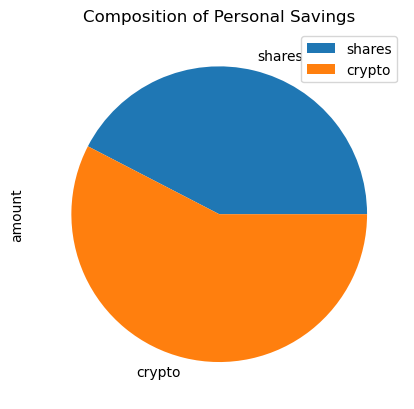

In [68]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [74]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings=shares_total+cryto_total

# Validate saving health
if total_savings > emergency_fund :
    print("Congratulations for having enough money in this fund!")
elif  total_savings == emergency_fund :
    print("Congratulations for reaching financial goal!")
else: 
    print(f"You are {emergency_fund-total_savings}  away from reaching the goal.")

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [80]:
# Set start and end dates of thirty years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_30 = pd.Timestamp('1993-09-22', tz='America/New_York').isoformat()
end_date_30 = pd.Timestamp('2023-09-22', tz='America/New_York').isoformat()

In [82]:
# Set the tickers
tickers = ['AGG','SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# # Get 30 years' worth of historical data for SPY and AGG
df_ticker_30 = api.get_bars(
    tickers,
    timeframe,
    start=start_date_30,
    end=end_date_30
).df

In [85]:
df_ticker_30.tail()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-09-18 04:00:00+00:00,443.05,444.970,442.56,443.63,55766891,412673,443.650349,SPY
2023-09-19 04:00:00+00:00,442.68,443.290,439.94,442.71,66520348,446142,441.962231,SPY
2023-09-20 04:00:00+00:00,444.01,444.435,438.43,438.64,82579458,508348,441.431366,SPY
2023-09-21 04:00:00+00:00,435.70,435.970,431.23,431.39,104123943,678363,433.697172,SPY
2023-09-22 04:00:00+00:00,432.45,434.100,429.99,430.42,100829684,637168,431.737394,SPY


In [88]:


# Reorganize the DataFrame
# Separate ticker data
spy_30 = df_ticker_30[df_ticker_30['symbol']=='SPY'].drop('symbol', axis=1)
agg_30 = df_ticker_30[df_ticker_30['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_30 = pd.concat([spy_30, agg_30], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_30.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2015-12-01 05:00:00+00:00      337780  209.921410  108.54  108.8400  108.43   
2015-12-02 05:00:00+00:00      367013  209.563055  108.73  108.7799  108.61   
2015-12-03 05:00:00+00:00      546768  206.878936  108.41  108.4100  107.81   
2015-12-04 05:00:00+00:00      556731  208.178631  108.05  108.3000  108.00   
2015-12-07 05:00:00+00:00      374705  208.276128  108.30  108.5800  108.23   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2015-12-01 05:00:00+00:00  108.820  4259986       15562  108.754152  
2015-12-02 05:00:00+00:00  108.685  2462787       11581  108.684692  
2015-12-03 05:00:00+00:00  107.890  4634020       16801  108.040315  
2015-12-04 05:00:00+00:00  108.240  2182057        9796  108.192232  
2015-12-07 05:00:00+00:00  108.400  2143773        9104  108.460067

In [93]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_30,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [94]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010210  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.013998  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019503  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006059  108.30   

                                                                           \
                               high     low    close   volume trade_count   
timestamp                                                                   
2015-12-01 05:00:00+00:00  108.8400  108.43  108.820  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.685  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.890  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.240  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.400  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001241  
2015-12-03 05:00:00+00:00  108.040315    -0.007315  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [95]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\renee\Documents\week_5_homework_api\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997788,1.006193,1.005770,0.999786,1.009575,1.005959,0.990074,0.998954,1.013280,1.003687,...,1.012516,1.005604,0.996479,1.014816,1.003100,0.994885,1.007274,0.995570,0.996765,1.000819
2,0.988737,1.001409,1.008993,1.004552,1.003433,1.005422,0.989749,1.004835,1.007914,1.002429,...,1.022782,1.002129,1.008897,1.018314,1.006004,0.993108,1.007716,0.993390,0.992615,0.987452
3,0.987996,0.992813,1.002607,0.998528,1.014702,1.003825,0.989128,1.001095,1.001280,1.003419,...,1.013321,0.995746,1.014936,1.020107,0.985537,0.998314,1.008029,0.995737,0.995617,0.983170
4,0.976695,0.980739,0.999779,0.994010,1.007955,0.999577,0.984224,1.003334,1.014203,1.004029,...,1.006779,1.000890,1.020777,1.012728,0.985198,0.989584,1.016476,0.987749,1.004395,0.993282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.092802,1.314850,1.378022,2.249001,1.302018,1.436634,1.809841,1.788181,1.074862,1.242094,...,1.047869,1.354938,0.805700,1.700314,1.249548,1.351479,1.199500,1.139622,1.227115,0.983520
1257,1.095921,1.316335,1.398439,2.274378,1.298984,1.440468,1.813352,1.792915,1.057916,1.221533,...,1.037185,1.352492,0.807971,1.687692,1.250088,1.340063,1.193737,1.148653,1.226127,0.975597
1258,1.102259,1.298357,1.405729,2.234736,1.296817,1.440617,1.815866,1.824117,1.065795,1.230736,...,1.045530,1.352072,0.804394,1.688518,1.240307,1.334629,1.186773,1.150020,1.226053,0.977229
1259,1.099519,1.301995,1.398618,2.220688,1.287940,1.445060,1.817003,1.799190,1.061884,1.230526,...,1.051620,1.353579,0.807559,1.678068,1.240815,1.346620,1.192825,1.141621,1.227415,0.976420


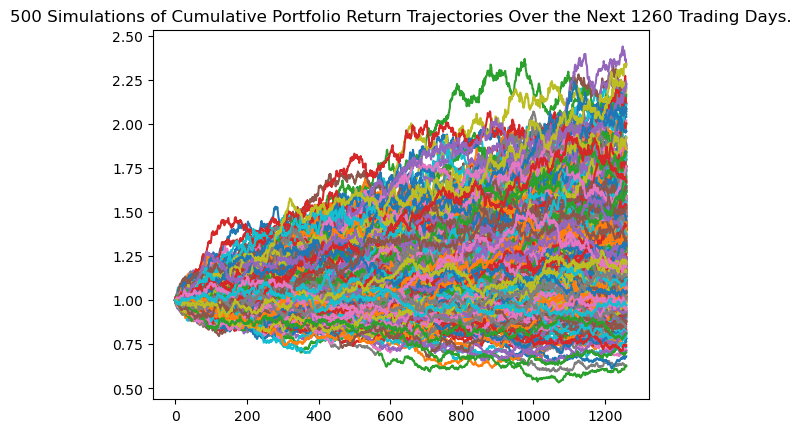

In [96]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

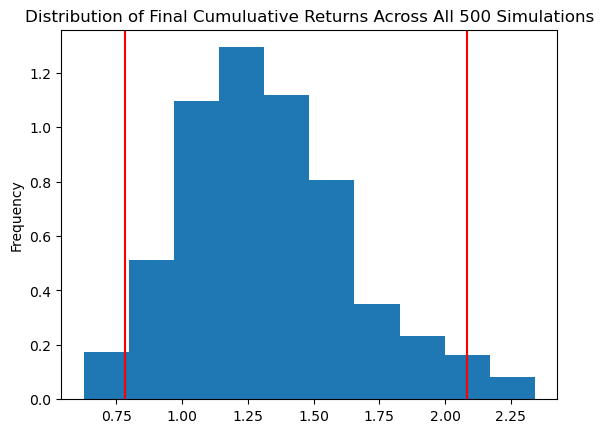

In [97]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.324116
std               0.322407
min               0.626398
25%               1.098780
50%               1.295086
75%               1.509084
max               2.341720
95% CI Lower      0.783480
95% CI Upper      2.084170
Name: 1260, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [99]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15669.61 and $41683.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [100]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $23504.41 and $62525.11
